In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
#Load file
file = 'loan_data.csv'
loans = pd.read_csv(file)

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


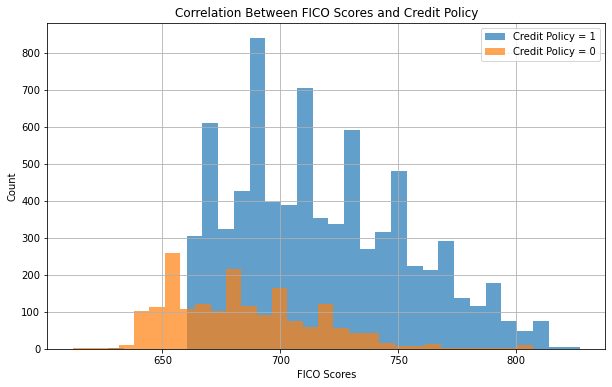

In [12]:
#Compare the FICO scores of users with credit policy 0 and 1
plt.figure(figsize=(10,6))
plt.title('Correlation Between FICO Scores and Credit Policy')
plt.ylabel('Count')
plt.xlabel('FICO Scores')
loans[loans['credit.policy']==1]['fico'].hist(bins=30, label='Credit Policy = 1', alpha=0.7)
loans[loans['credit.policy']==0]['fico'].hist(bins=30, label='Credit Policy = 0', alpha=0.7)

plt.legend()
plt.show()

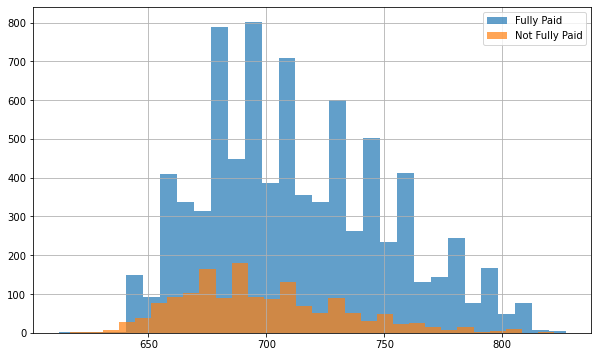

In [13]:
#Compare FICO scores between users that have and have not made repayment
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, label='Fully Paid', alpha=0.7)
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, label='Not Fully Paid', alpha=0.7)

plt.legend()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

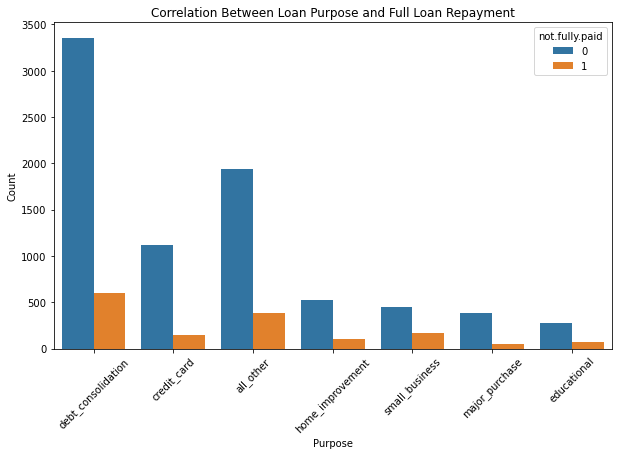

In [18]:
#Compare loan purposes with repayment
plt.figure(figsize=(10,6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')
plt.title('Correlation Between Loan Purpose and Full Loan Repayment')
plt.ylabel('Count')
plt.xlabel('Purpose')
plt.xticks(rotation=45)

Text(0.5, 1.02, 'Interest Rate against FICO Score')

<Figure size 720x432 with 0 Axes>

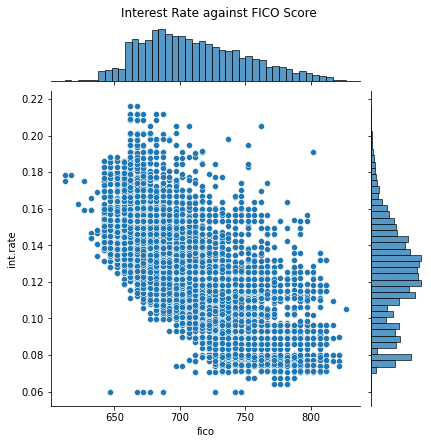

In [21]:
#Observe correlation between interest rate and FICO scores
plt.figure(figsize=(10,6))
multig = sns.jointplot(data=loans, x='fico', y='int.rate')
multig.fig.suptitle('Interest Rate against FICO Score', y=1.02)

Text(0.5, 1.02, 'How do Credit Policy Status and Full Loan Repayment Relate with Interest Rate against FICO Score?')

<Figure size 720x432 with 0 Axes>

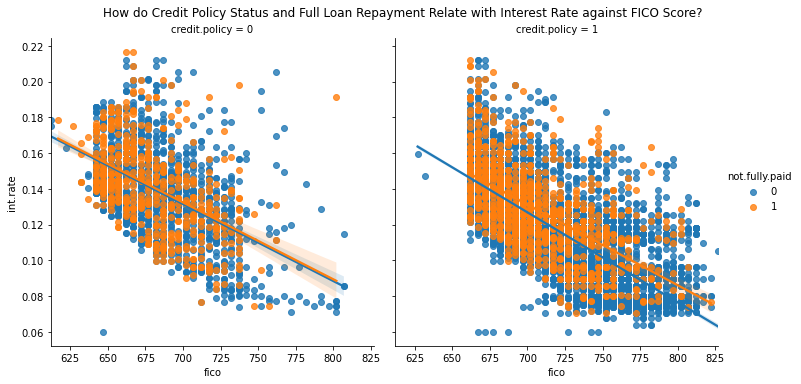

In [22]:
#Observe the above correlation along with user credit policy and repayment
plt.figure(figsize=(10,6))

lm = sns.lmplot(data=loans, x='fico', y='int.rate', hue='not.fully.paid', col='credit.policy')
lm.fig.suptitle('How do Credit Policy Status and Full Loan Repayment Relate with Interest Rate against FICO Score?', y=1.02)

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [24]:
#Categorical feature
cat_feats = ['purpose']

In [25]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [26]:
#Include categorical features as dummy variables
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True) # drop_first=True to avoid multi-colinearity

In [27]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [28]:
#Feature-target split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Create instance of Decision Tree model
dtree = DecisionTreeClassifier()

#Fit DT model onto training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
#Make predictions with DT model using test features
predictions = dtree.predict(X_test)

In [30]:
features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [31]:
#Decision tree model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2419
           1       0.21      0.24      0.22       455

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.74      0.75      2874

[[2020  399]
 [ 347  108]]


In [42]:
#Visualize trees
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, max_depth=3, filled=True, rounded=True, leaves_parallel=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png('Decision_Tree_Visualization.png')

True

In [43]:
#Create Random Forest Classifier model with 300 estimators
rfc = RandomForestClassifier(n_estimators=300)

#Fit RFC on training features and target
rfc.fit(X_train, y_train)

#Make prediction using the RFC model
rfc_pred = rfc.predict(X_test)

In [44]:
#RFC model evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2419
           1       0.44      0.02      0.03       455

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874

[[2409   10]
 [ 447    8]]
